## Goal:
---
Working for Zyfra, a company who develops efficiency solutions for the heavy industry, they need a machine learning model that predicts the amount of gold recovered from gold ores, which can help optimize the production and eliminate unprofitable parameters.

### Stages:
1. Data Preprocessing: Clean and organize the data, ensuring it's ready for analysis.
2. Exploratory Data Analysis (EDA): Perform an initial analysis to understand the data distribution and identify key trends.
3. Eliminate Abnormal Values: Look into training & test sets to see if there are any values that stand out. If so, find a way to deal with them.
4. ID Target/Feature Variables: Find out exactly what variable is being tested.
5. Train Various Models: Train & evaluate various models for the task using MAE & CV.
6. Calculate sMAPE: Use formula to help simulate the process of recovering gold from gold ore.

## Prepare Data
---

### Import Libraries & Modules

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

### Load Datasets

In [2]:
gr_train = pd.read_csv('/datasets/gold_recovery_train.csv')
gr_test = pd.read_csv('/datasets/gold_recovery_test.csv')
gr_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
gr_train.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [4]:
gr_test.head(10)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


In [5]:
print(gr_train.info())
print(gr_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


### Using the training set, calculate recovery for the 'rougher.output.recovery' feature. 

In [6]:
# Using the training set, calculate recovery for the 'rougher.output.recovery' feature.
sorted(gr_train['rougher.output.recovery'].head())

[86.68879413602453,
 86.84230825746624,
 86.84326050586624,
 87.10776292825425,
 87.22642953304764]

In [7]:
# Calculate the recovery for the rougher process
C_rough = gr_train['rougher.output.concentrate_au']
F_rough = gr_train['rougher.input.feed_au']
T_rough = gr_train['rougher.output.tail_au']
recovery_rough = (C_rough * (F_rough - T_rough) / F_rough * (C_rough - T_rough)) 
reocvery_rough = recovery_rough * 100 #(100%)

In [8]:
sorted(recovery_rough.head())

[287.25710802179924,
 290.23383810987275,
 299.61991667599386,
 302.12207038703593,
 309.10254419757393]

In [9]:
(recovery_rough - gr_train['rougher.output.recovery']).abs().mean()

192.24731416802695

### Analyze the features not available in the test set. What are these parameters? What is their type?

In [10]:
# Analyze the features not available in the test set.
diff = []
gr_train_col = gr_train.columns
gr_test_col = gr_test.columns
for i in gr_train_col:
    if i not in gr_test_col:
        diff.append(i)

In [11]:
diff

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

After finding the columns that are listed in the training set but not the test set, it seems that majority of these parameters are of the output parameter type with a few instances of the calculation parameter type. Moreover, after checking the type of columns present within the both training and testing files. At first, I wondered what was the purpose of excluding the outputs from the test set but I recalled some parameters were not available because they were measured and/or calculated much later.

### Perform data preprocessing

In [12]:
gr_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


#### Null Check

In [13]:
def null_check(df):
    null_count = df.isna().sum()
    max_null_count = df.isna().sum().max()
    return null_count, max_null_count

In [14]:
null_count_train, max_null_train = null_check(gr_train)
print('Training Set Null Count:', null_count_train)
print('Training Set Max Null #:', max_null_train)

Training Set Null Count: date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64
Training Set Max Null #: 2573


In [15]:
null_count_test, max_null_test = null_check(gr_test)
print('Test Set Null Count:', null_count_test)
print('Test Set Max Null #:', max_null_test)

Test Set Null Count: date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sul

In [16]:
null_count_full, max_null_full = null_check(gr_full)
print('Training Set Null Count:', null_count_full)
print('Training Set Max Null #:', max_null_full)

Training Set Null Count: date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64
Training Set Max Null #: 3119


#### Duplicates Check

In [17]:
def dup_check(df):
    dup_count = df.duplicated().sum()
    return dup_count

In [18]:
dup_count_train = dup_check(gr_train)
print('Training set Duplicates Count:', dup_count_train)

Training set Duplicates Count: 0


In [19]:
dup_count_test = dup_check(gr_test)
print('Test set Duplicates Count:', dup_count_test)

Test set Duplicates Count: 0


In [20]:
dup_count_full = dup_check(gr_full)
print('Full set Duplicates Count:', dup_count_full)

Full set Duplicates Count: 0


#### Fill Nulls

In [21]:
def na_fill(df):
    df = df.fillna(method='ffill')
    return df

In [22]:
gr_train = na_fill(gr_train)
null_count_train_2, max_null_train_2 = null_check(gr_train)
print('Training Set Null Count:', null_count_train_2)
print('Training Set Max Null #:', max_null_train_2)

Training Set Null Count: date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64
Training Set Max Null #: 0


In [23]:
gr_test = na_fill(gr_test)
null_count_test_2, max_null_test_2 = null_check(gr_test)
print('Test Set Null Count:', null_count_test_2)
print('Test Set Max Null #:', max_null_test_2)

Test Set Null Count: date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.float

In [24]:
gr_full = na_fill(gr_full)
null_count_full_2, max_null_full_2 = null_check(gr_full)
print('Full Set Null Count:', null_count_full_2)
print('Full Set Max Null #:', max_null_full_2)

Full Set Null Count: date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64
Full Set Max Null #: 0


The inituition behind filling the null values with last valid value is to ensure that the integrity of the gold ore mining process is being accurately accounted for on an hourly basis. For example, referencing the date column, if the nulls were deleted, there would be gaps in some of the hours, which wouldn't be an accurate, consistent representation of the entire process.  

In [25]:
gr_full['date'] = pd.to_datetime(gr_full['date'], format='%Y-%m-%dT%H:%M:%S')

In [26]:
gr_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                22716 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         22716 non-null  float64       
 2   final.output.concentrate_pb                         22716 non-null  float64       
 3   final.output.concentrate_sol                        22716 non-null  float64       
 4   final.output.concentrate_au                         22716 non-null  float64       
 5   final.output.recovery                               22716 non-null  float64       
 6   final.output.tail_ag                                22716 non-null  float64       
 7   final.output.tail_pb                                22716 non-null  float64       
 8   final.

After conducting a check for nulls & duplicates and handling the null values, the dataset seems sufficient for further analysis/preproccessing.

## Analyze the Data
---

### Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

To study the concentrations of the metals at different stages, the levels will be taken first after the rougher stage, after primary cleaner stage(to measure the 1st level purification) and after the secondary cleaner stage(to measure the 2nd level purification).

In [27]:
conc_ag = gr_full[['rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']].sum()
conc_pb = gr_full[['rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']].sum()
conc_au = gr_full[['rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']].sum()

,ag_process,concentration_level
0,rougher.output.concentrate_ag,246368.863860
1,primary_cleaner.output.concentrate_ag,174162.930712
2,final.output.concentrate_ag,108310.180492


<AxesSubplot:xlabel='ag_process', ylabel='concentration_level'>

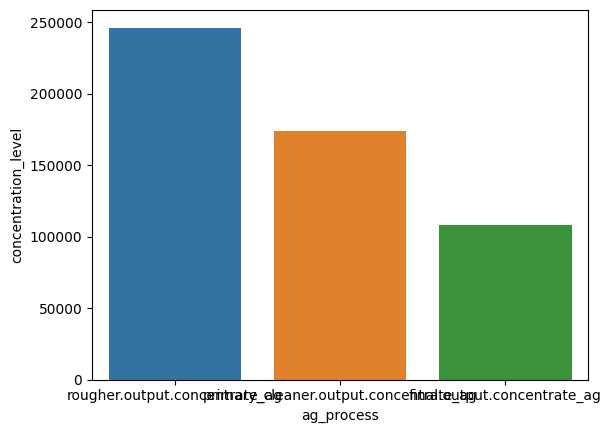

In [28]:
conc_ag = conc_ag.reset_index()
conc_ag = conc_ag.rename(columns={'index': 'ag_process', 0: 'concentration_level'})  # Rename columns
display(conc_ag)
sns.barplot(x='ag_process', y='concentration_level', data=conc_ag)

,pb_process,concentration_level
0,rougher.output.concentrate_pb,156442.126750
1,primary_cleaner.output.concentrate_pb,200110.183752
2,final.output.concentrate_pb,206065.154798


<AxesSubplot:xlabel='pb_process', ylabel='concentration_level'>

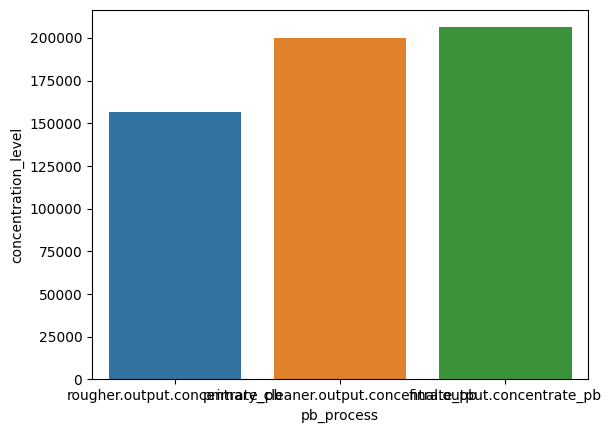

In [29]:
conc_pb = conc_pb.reset_index()
conc_pb= conc_pb.rename(columns={'index': 'pb_process', 0: 'concentration_level'})  # Rename column
display(conc_pb)
sns.barplot(x='pb_process', y='concentration_level', data=conc_pb)

,au_process,concentration_level
0,rougher.output.concentrate_au,405060.555729
1,primary_cleaner.output.concentrate_au,661489.159778
2,final.output.concentrate_au,906180.262071


<AxesSubplot:xlabel='au_process', ylabel='concentration_level'>

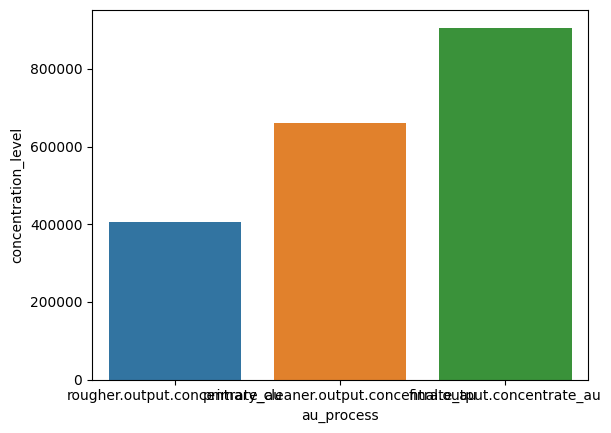

In [30]:
conc_au = conc_au.reset_index()
conc_au= conc_au.rename(columns={'index': 'au_process', 0: 'concentration_level'})  # Rename column
display(conc_au)
sns.barplot(x='au_process', y='concentration_level', data=conc_au)

The inuition behind the graphs is to sum and categorize the concentration levels before and after the primary & secondary stages of purication to show how the total concentration levels changes after each purification. It seems that the further that silver goes through the purification stages of the process, the concentration levels decline. However, for lead & gold, it is the opposite with the second stage of purification increasing the concentration levels for gold relatively higher than lead.

### Compare the feed particle size distributions in the training set and in the test set.

1. Null: The feed particle size distributions in both sets are the same
2. Alt: The feed particle size distributions in both sets differ

In [31]:
# If the distributions vary significantly, the model evaluation will be incorrect (Hypothesis Testing?)
# Training set & test set:
# 'primary_cleaner.input.feed_size'
# 'rougher.input.feed_size"

fs_rough_train = gr_train['rougher.input.feed_size']
fs_rough_test = gr_test['rougher.input.feed_size']
alpha = 0.05
results = st.ttest_ind(fs_rough_train, fs_rough_test)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('reject the null hypothesis')
else:
    print('can not reject the null hypothesis')

p-value: 7.63075072511601e-23
reject the null hypothesis


In [32]:
fs_pri_train = gr_train['primary_cleaner.input.feed_size']
fs_pri_test = gr_test['primary_cleaner.input.feed_size']
alpha = 0.05
results = st.ttest_ind(fs_pri_train, fs_pri_test)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('reject the null hypothesis')
else:
    print('can not reject the null hypothesis')

p-value: 0.0004916543727368148
reject the null hypothesis


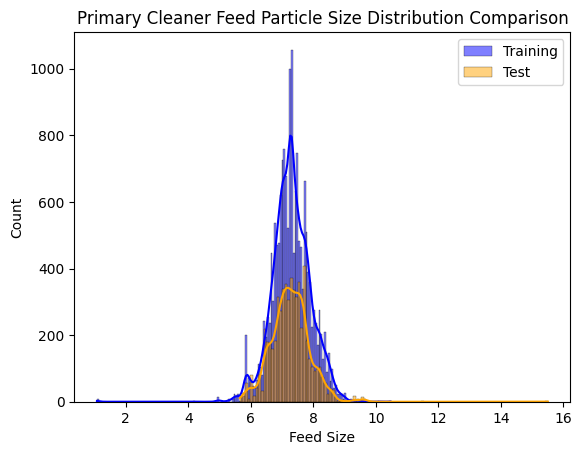

In [33]:
# Plotting overlapping histograms with KDE
sns.histplot(data=gr_train, x='primary_cleaner.input.feed_size', color='blue', alpha=0.5, kde=True, label='Training')
sns.histplot(data=gr_test, x='primary_cleaner.input.feed_size', color='orange', alpha=0.5, kde=True, label='Test')

# Adding labels and legend
plt.title('Primary Cleaner Feed Particle Size Distribution Comparison')
plt.xlabel('Feed Size')
plt.ylabel('Count')
plt.legend()

plt.show()

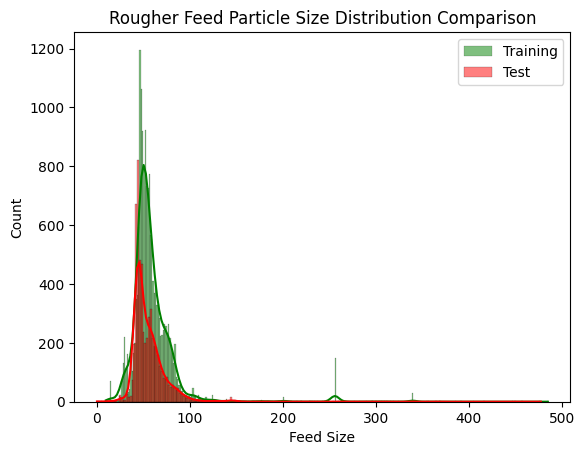

In [34]:
# Plotting overlapping histograms with KDE
sns.histplot(data=gr_train, x='rougher.input.feed_size', color='green', alpha=0.5, kde=True, label='Training')
sns.histplot(data=gr_test, x='rougher.input.feed_size', color='red', alpha=0.5, kde=True, label='Test')

# Adding labels and legend
plt.title('Rougher Feed Particle Size Distribution Comparison')
plt.xlabel('Feed Size')
plt.ylabel('Count')
plt.legend()

plt.show()

In [35]:
# Plotting overlapping histograms with KDE
gr_train['rougher.input.feed_size'].describe()
#gr_train['rougher.input.feed_size'].var()

count    16860.000000
mean        60.188595
std         30.522242
min          9.659576
25%         47.548897
50%         54.066003
75%         65.397249
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [36]:
gr_test['rougher.input.feed_size'].describe()
#gr_test['rougher.input.feed_size'].var()

count    5856.000000
mean       55.898866
std        22.707969
min         0.046369
25%        43.852884
50%        49.964796
75%        61.628003
max       477.445473
Name: rougher.input.feed_size, dtype: float64

### Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. 

In [37]:
# Concentration levels of every substance at: raw feed, rougher conc & final concentrate
# raw feed: 
# rougher.input.feed_ag, rougher.input.feed_au, rougher.input.feed_pb, rougher.input.feed_sol
# rougher conc:
# rougher.output.concentrate_ag, rougher.output.concentrate_au, rougher.output.concentrate_pb, rougher.output.concentrate_sol
# final conc:
# final.output.concentrate_ag, final.output.concentrate_au, final.output.concentrate_pb, final.output.concentrate_sol
conc_raw = gr_full[['rougher.input.feed_ag', 'rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_sol']]
conc_rough = gr_full[['rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']]
conc_final = gr_full[['final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_sol']]

In [38]:
def total_conc(df_slice):
    df_slice = np.array(df_slice)
    df_slice = df_slice.sum(axis=1)
    df_slice = pd.Series(df_slice)
    return df_slice

#### Raw Feed Stage

In [39]:
conc_raw = total_conc(conc_raw)
conc_raw

0        51.680034
1        50.659114
2        50.609929
3        51.061546
4        47.859163
           ...    
22711    53.415050
22712    53.696482
22713    54.589604
22714    54.027355
22715    53.535054
Length: 22716, dtype: float64

#### Rougher Concentrate Stage

In [40]:
conc_rough = total_conc(conc_rough)
conc_rough

0        66.424950
1        67.012710
2        66.103793
3        65.752751
4        65.908382
           ...    
22711    70.781325
22712    70.539603
22713    55.376330
22714    69.201689
22715    69.544003
Length: 22716, dtype: float64

#### Final Concentrate Stage

In [41]:
conc_final = total_conc(conc_final)
conc_final

0        63.644396
1        63.957723
2        64.311180
3        63.573449
4        64.004667
           ...    
22711    68.098589
22712    68.274362
22713    68.226068
22714    68.200449
22715    68.353154
Length: 22716, dtype: float64

### Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? 

In [42]:
# Do you notice any abnormal values in the total distribution? 
# If you do, is it worth removing such values from both samples? 
# Describe the findings and eliminate anomalies

In [43]:
def outlier_detect(df):
    data = np.array(df)
 
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    threshold = 1.5 * iqr
    outliers = np.where((data < q1 - threshold) | (data > q3 + threshold))
    
    return data, data[outliers]

In [44]:
raw_data, raw_outliers = outlier_detect(conc_raw)
print("Outliers of array: ", raw_outliers)
print('# of Outliers:', len(raw_outliers))

Outliers of array:  [25.35235777  0.20416409 27.93090398 ...  0.04        0.04
 14.07936906]
# of Outliers: 2508


In [45]:
rough_data, rough_outliers = outlier_detect(conc_rough)
print("Outliers of array: ", rough_outliers)
print('# of Outliers:', len(rough_outliers))

Outliers of array:  [30.03719929  0.          0.         ...  0.04        0.04
  0.1232209 ]
# of Outliers: 3147


In [46]:
final_data, final_outliers = outlier_detect(conc_final)
print("Outliers of array: ", final_outliers)
print('# of Outliers:', len(final_outliers))

Outliers of array:  [59.90221469 38.11772353  0.         ... 13.261026   25.68441336
 59.34680488]
# of Outliers: 3244


<AxesSubplot:>

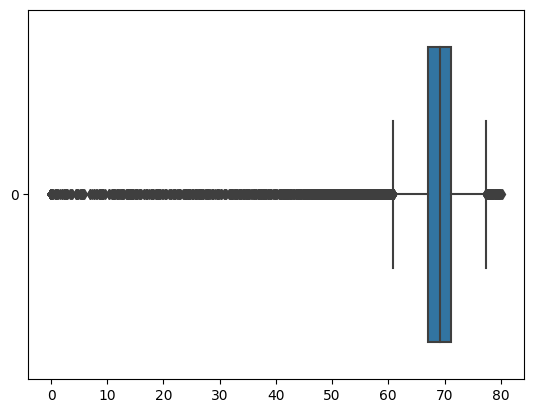

In [47]:
sns.boxplot(data=conc_final, orient='h') 

<AxesSubplot:>

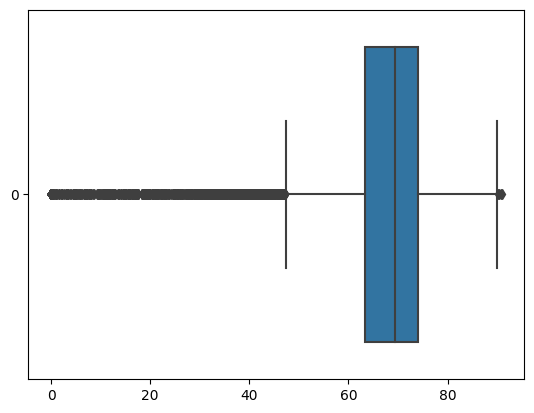

In [48]:
sns.boxplot(data=conc_rough, orient='h') 

<AxesSubplot:>

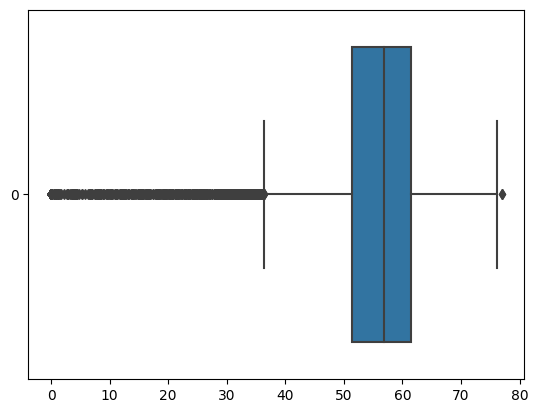

In [49]:
sns.boxplot(data=conc_raw, orient='h') 

After determining the outliers/abnormal values via the IQR method, some were present in the total distribution of each stage. With that being said, the main objective is to train and produce an accurate model. Thus it would be beneficial to eliminate these anamolies so they don't negatively affect the quality of the model. 

In [50]:
# Training Sample
conc_raw_train = gr_train[['rougher.input.feed_ag', 'rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_sol']]
conc_raw_train_sum = total_conc(conc_raw_train)
raw_data_train, raw_outliers_train = outlier_detect(conc_raw_train_sum)
print("Outliers of array: ", raw_outliers_train)
print('# of Outliers:', len(raw_outliers_train))

Outliers of array:  [25.35235777  0.20416409 27.93090398 ...  0.04        0.04
 14.07936906]
# of Outliers: 1990


In [51]:
# Training Sample
conc_rough_train = gr_train[['rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']]
conc_rough_train_sum = total_conc(conc_rough_train)
rough_data_train, rough_outliers_train = outlier_detect(conc_rough_train_sum)
print("Outliers of array: ", rough_outliers_train)
print('# of Outliers:', len(rough_outliers_train))

Outliers of array:  [30.03719929  0.          0.         ...  0.04        0.04
  0.1232209 ]
# of Outliers: 2495


In [52]:
# Training Sample
conc_final_train = gr_train[['final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_sol']]
conc_final_train_sum = total_conc(conc_final_train)
final_data_train, final_outliers_train = outlier_detect(conc_final_train_sum)
print("Outliers of array: ", final_outliers_train)
print('# of Outliers:', len(final_outliers_train))

Outliers of array:  [59.90221469 38.11772353  0.         ... 13.261026   25.68441336
 59.34680488]
# of Outliers: 2448


In [53]:
# Test Sample
conc_raw_test = gr_test[['rougher.input.feed_ag', 'rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_sol']]
conc_raw_test_sum = total_conc(conc_raw_test)
raw_data_test, raw_outliers_test = outlier_detect(conc_raw_test_sum)
print("Outliers of array: ", raw_outliers_test)
print('# of Outliers:', len(raw_outliers_test))

Outliers of array:  [ 4.50186789  0.          0.         39.77051204  0.          0.
  0.         40.08569133  0.          0.          0.          0.
  0.          0.          0.          0.          0.         19.1846653
 34.32214524 29.83111834  0.          0.          0.          0.
  3.70614074 22.93236485 28.00373275  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          3.78484688 22.21085893  0.          0.
  0.          0.         22.06204096 33.14623912  0.         16.14374395
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.   

After running a brief check for outliers within the specified columns, there seems to be outliers present in all of the stages of training and testing samples except for the rougher & final outputs of the testing set (disclosed in project description & exact columns were identified earlier in the project).

In [54]:
def outlier_delete(df_sample, outlier_list):
    df_sample_1 = np.array(df_sample)
    df_sample_2 = df_sample_1.sum(axis=1)
    df_sample_2 = pd.Series(df_sample_2)

    # Identify boolean array where outliers exist
    outlier_mask = np.isin(df_sample_2, outlier_list)

    # Use the mask to filter out rows in conc_raw_test_2
    df_sample_1_cleaned = df_sample_1[~outlier_mask]

    df_sample_2_cleaned = df_sample_1_cleaned.sum(axis=1)
    df_sample_2_cleaned = pd.Series(df_sample_2_cleaned)
    df_sample_3_cleaned = df_sample_2_cleaned[df_sample_2_cleaned.isin(outlier_list) == True].count()

    return df_sample_1_cleaned, df_sample_3_cleaned

In [55]:
conc_raw_train_cleaned, raw_train_outlier_check = outlier_delete(conc_raw_train, raw_outliers_train)
conc_raw_train_cleaned = pd.DataFrame(conc_raw_train_cleaned)
display(conc_raw_train_cleaned)
print("# of remaining outliers:", raw_train_outlier_check )

,0,1,2,3
0,6.100378,6.486150,2.284912,36.808594
1,6.161113,6.478583,2.266033,35.753385
2,6.116455,6.362222,2.159622,35.971630
3,6.043309,6.118189,2.037807,36.862241
4,6.060915,5.663707,1.786875,34.347666
...,...,...,...,...
14865,6.091855,5.335862,4.617558,37.369774
14866,6.121323,4.838619,4.144989,38.591551
14867,5.970515,4.525061,4.020002,40.074026
14868,6.048130,4.362781,3.902537,39.713906


# of remaining outliers: 0


In [56]:
conc_rough_train_cleaned, rough_train_outlier_check = outlier_delete(conc_rough_train, rough_outliers_train)
conc_rough_train_cleaned = pd.DataFrame(conc_rough_train_cleaned)
display(conc_rough_train_cleaned)
print("# of remaining outliers:", rough_train_outlier_check )

,0,1,2,3
0,11.500771,19.793808,7.101074,28.029297
1,11.615865,20.050975,7.278807,28.067063
2,11.695753,19.737170,7.216833,27.454037
3,11.915047,19.320810,7.175616,27.341277
4,12.411054,19.216101,7.240205,27.041023
...,...,...,...,...
14360,11.124896,18.603550,10.984003,30.068876
14361,11.425983,18.441436,10.888213,29.783972
14362,8.523497,15.111231,8.955135,22.786467
14363,11.658799,17.834772,10.655377,29.052742


# of remaining outliers: 0


In [57]:
conc_final_train_cleaned, final_outliers_train_check = outlier_delete(conc_final_train, final_outliers_train)
conc_final_train_cleaned = pd.DataFrame(conc_final_train_cleaned)
display(conc_final_train_cleaned)
print("# of remaining outliers:", final_outliers_train_check )

,0,1,2,3
0,6.055403,42.192020,9.889648,5.507324
1,6.029369,42.701629,9.968944,5.257781
2,6.055926,42.657501,10.213995,5.383759
3,6.047977,42.689819,9.977019,4.858634
4,6.148599,42.774141,10.142511,4.939416
...,...,...,...,...
14407,3.224920,46.713954,11.356233,6.803482
14408,3.195978,46.866780,11.349355,6.862249
14409,3.109998,46.795691,11.434366,6.886013
14410,3.367241,46.408188,11.625587,6.799433


# of remaining outliers: 0


In [58]:
conc_raw_test_cleaned, raw_test_outlier_check = outlier_delete(conc_raw_test, raw_outliers_test)
conc_raw_test_cleaned = pd.DataFrame(conc_raw_test_cleaned)
display(conc_raw_test_cleaned)
print("# of remaining outliers:", raw_test_outlier_check )

,0,1,2,3
0,13.128569,12.084103,5.636710,42.022440
1,13.036280,11.918977,5.526065,41.187903
2,13.138412,12.091332,5.426561,42.546294
3,12.400507,12.181597,5.114758,41.060195
4,11.327427,11.290425,4.767383,41.269161
...,...,...,...,...
5327,11.638973,10.554544,4.695306,42.022027
5328,11.338091,10.254051,4.478381,41.096377
5329,11.285908,10.169094,4.405327,41.095485
5330,11.289710,10.071156,4.343488,41.715740


# of remaining outliers: 0


In [59]:
gr_train[['rougher.input.feed_ag', 'rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_sol']] = conc_raw_train_cleaned[[0,1,2,3]]
gr_train[['rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']] = conc_rough_train_cleaned[[0,1,2,3]]
gr_train[['final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_sol']] = conc_final_train_cleaned[[0,1,2,3]]
gr_test[['rougher.input.feed_ag', 'rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_sol']] = conc_raw_test_cleaned[[0,1,2,3]]

In [60]:
print(gr_train.isna().sum())
print('----------------------------------------------------')
print(gr_test.isna().sum())

date                                             0
final.output.concentrate_ag                   2448
final.output.concentrate_pb                   2448
final.output.concentrate_sol                  2448
final.output.concentrate_au                   2448
                                              ... 
secondary_cleaner.state.floatbank5_a_level       0
secondary_cleaner.state.floatbank5_b_air         0
secondary_cleaner.state.floatbank5_b_level       0
secondary_cleaner.state.floatbank6_a_air         0
secondary_cleaner.state.floatbank6_a_level       0
Length: 87, dtype: int64
----------------------------------------------------
date                                            0
primary_cleaner.input.sulfate                   0
primary_cleaner.input.depressant                0
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                  0
primary_cleaner.state.floatbank8_a_air          0
primary_cleaner.state.floatbank8_a_level        0
primary_cle

In [61]:
gr_train = gr_train.dropna()
gr_test = gr_test.dropna()

In [62]:
print(gr_train.isna().sum())
print('----------------------------------------------------')
print(gr_test.isna().sum())

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64
----------------------------------------------------
date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cl

After deleting the outliers, some rows became null. In order to maintain data integrity, these nulls will dropped given their proportion in the samples.

## Build the Model

### Write a function to calculate the final sMAPE value.

In [63]:
# yi = Value of target for the observation with the i index in the sample used to measure quality./ the actual Y values in the training set
# ^yi = Value of prediction for the observation with the i index, for example, in the test sample./ the predicted Y values obtained from the model
# N = Number of observations in the sample.
# N
# ⅀ = Summation over all observations of the sample (i takes values from 1 to N).
# i=1
# |y| =
# |^yi| =
# |y - ^yi| =
#sMAPE = (1/N) * gr_train/test.sum() * (abs(target_rough/final_train - target_rough/final_test) / (abs(target_rough/final_train) + abs(target_rough/final_test))/2) * 100

#### Develop Features & Target Variables

In [64]:
# predictions are needed for the following variables:
# 1. final.output.recovery
# 2. rougher.output.recovery
target = ['rougher.output.recovery', 'final.output.recovery']

# Assume 'target_column_name' is your target column
y_train = gr_train[['rougher.output.recovery', 'final.output.recovery']]
y_test = gr_full[gr_full['date'].isin(gr_test['date'])][target].reset_index(drop=True)

# Drop columns directly using the diff list
gr_train = gr_train.drop(columns=diff)

gr_train = gr_train.drop('date', axis=1)
gr_test = gr_test.drop('date', axis=1)

x_train = gr_train
x_test = gr_test

#### Scale Numeric Features

In [65]:
# Scale Numeric Features
scaler = StandardScaler() # Fit the scaler on the features and transform
# Fit the scaler on the features and transform
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Train Models based on MAE for via CV

In [70]:
# For rougher target
# Assuming features and target data are not split yet
lr = LinearRegression()
scores = cross_val_score(lr, x_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))


print('Cross-validated MAE scores:', scores)
print('Average model quality score (MAE):', scores.mean())

Cross-validated MAE scores: [13.81424164  7.74592756  9.66095247 13.05337284 14.7354849 ]
Average model quality score (MAE): 11.801995879728938


In [67]:
# For rougher target
# Assuming features and target data are not split yet
dt_rough = DecisionTreeRegressor(random_state=12345)
scores = cross_val_score(dt_rough, x_train, y_train, cv=5,  scoring=make_scorer(mean_absolute_error))

print('Cross-validated MAE scores:', scores)
print('Average model quality score (MAE):', scores.mean())

Cross-validated MAE scores: [14.90285227 16.46781676 11.26131809 14.48677708 15.87322748]
Average model quality score (MAE): 14.598398335544513


In [68]:
# For rougher target
# Assuming features and target data are not split yet
rf_rough = RandomForestRegressor(random_state=12345)
scores = cross_val_score(rf_rough, x_train, y_train, cv=5,  scoring=make_scorer(mean_absolute_error))

print('Cross-validated MAE scores:', scores)
print('Average model quality score (MAE):', scores.mean())

Cross-validated MAE scores: [10.14132795 11.15713223 13.29750394 10.3372615  15.7117738 ]
Average model quality score (MAE): 12.128999884518917


In [71]:
lr.fit(x_train, y_train)
pred_y_test = lr.predict(x_test)

In [72]:
pred_y_test = pd.DataFrame(pred_y_test)

In [75]:
y_test

,rougher.output.recovery,final.output.recovery
0,89.993421,70.273583
1,88.089657,68.910432
2,88.412756,68.143213
3,87.360133,67.776393
4,83.236367,61.467078
...,...,...
5327,89.618197,69.382577
5328,88.846969,69.767501
5329,87.267080,70.513251
5330,86.630270,65.852532


In [78]:
pred_y_test=pred_y_test.rename(columns={0: 'predicted_rougher_recovery', 1: 'predicted_final_recovery'})  # Rename columns
pred_y_test

,predicted_rougher_recovery,predicted_final_recovery
0,82.587091,70.722940
1,85.166645,70.160036
2,84.971660,69.924616
3,86.483901,69.737531
4,87.619973,68.261531
...,...,...
5327,95.671408,80.431194
5328,94.572205,83.938215
5329,94.364328,82.771908
5330,92.247450,78.993130


In [79]:
y_test_rough = y_test['rougher.output.recovery']
pred_y_test_rough = pred_y_test['predicted_rougher_recovery']

In [81]:
pred_y_test_rough

0       82.587091
1       85.166645
2       84.971660
3       86.483901
4       87.619973
          ...    
5327    95.671408
5328    94.572205
5329    94.364328
5330    92.247450
5331    90.891182
Name: predicted_rougher_recovery, Length: 5332, dtype: float64

#### Rougher sMAPE

In [82]:
# yi = Value of target for the observation with the i index in the sample used to measure quality./ the actual Y values in the training set
# ^yi = Value of prediction for the observation with the i index, for example, in the test sample./ the predicted Y values obtained from the model
N = 5332
act_y = y_test_rough
pred_y = pred_y_test_rough

act_y_abs = y_test_rough.abs()
pred_y_abs = pred_y_test_rough.abs()
abs_y_diff = (y_test_rough - pred_y_test_rough).abs()
#sMAPE = (1/N) * gr_train/test.sum() * (abs(target_rough/final_train - target_rough/final_test) / (abs(target_rough/final_train) + abs(target_rough/final_test))/2) * 100

In [83]:
sMAPE_rough = (100 / N) * (abs(act_y_abs - pred_y_abs) / ((act_y_abs + pred_y_abs) / 2)).sum()

In [84]:
sMAPE_rough

12.4756939803747

In [85]:
y_test_final = y_test['final.output.recovery']
pred_y_test_final = pred_y_test['predicted_final_recovery']

#### Final sMAPE

In [86]:
# yi = Value of target for the observation with the i index in the sample used to measure quality./ the actual Y values in the training set
# ^yi = Value of prediction for the observation with the i index, for example, in the test sample./ the predicted Y values obtained from the model
N = 5332
act_y = y_test_final
pred_y = pred_y_test_final

act_y_abs = y_test_final.abs()
pred_y_abs = pred_y_test_final.abs()
abs_y_diff = (y_test_final - pred_y_test_final).abs()
#sMAPE = (1/N) * gr_train/test.sum() * (abs(target_rough/final_train - target_rough/final_test) / (abs(target_rough/final_train) + abs(target_rough/final_test))/2) * 100

In [87]:
sMAPE_final = (100 / N) * (abs(act_y_abs - pred_y_abs) / ((act_y_abs + pred_y_abs) / 2)).sum()

In [88]:
sMAPE_final

11.321928479887506

#### Calculate Total sMAPE

In [89]:
total_sMAPE = (0.25 * sMAPE_rough) + (0.75 * sMAPE_final)

In [90]:
total_sMAPE

11.610369855009305

## Conclusion
---

With the above calculations in mind, the prototype of the machine learning model that most accurately predicts the amount of gold recovered from gold ore is the Linear Regression model, which was determined by having the lowest MAE. With this model, it will help to optimize the production.